In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA

In [2]:
### Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [3]:
#Import Data
data = pd.read_csv('fer2013.csv', low_memory=False)

In [4]:
data.head()

,emotion,0,1,2,3,4,5,6,7,8,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [5]:
#Parameters
num_features = 2304
square_dimension = 2304

In [6]:
#Assumes Label is the first column 0, attributes are the rest 1-2304 

#Divide up the data and labels
train = data.sample(frac=0.8)
test = data.drop(train.index)

#Train Data
trainDF = train[train.columns[1:num_features+1]]    #DF
Train_data = trainDF.values.astype(np.float32) #ndarray

train_labelDF = train[train.columns[0]]
Train_labels = train_labelDF.values.astype(np.int32)

#Test data
testDF = test[test.columns[1:num_features+1]]    #DF
Test_data = testDF.values.astype(np.float32) #ndarray

test_labelDF = test[test.columns[0]]
Test_labels = test_labelDF.values.astype(np.int32)

print("Train_data shape: " + str(Train_data.shape))
print("Train_labels shape: " + str(Train_labels.shape))
print("Test_data shape: " + str(Test_data.shape))
print("Test_labels shape: " + str(Test_labels.shape))


Train_data shape: (28710, 2304)
Train_labels shape: (28710,)
Test_data shape: (7177, 2304)
Test_labels shape: (7177,)


In [7]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(48, 48),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [8]:
def XZCVPR(X):
    print ("X shape: " + str(X.shape))
    
    mu=np.mean(X,axis=0)
    print ("mu shape: " + str(mu.shape))
    
    plt.plot(mu)
    plt.show()
    
    vectortoimg(mu)
    
    Z=X-mu
    print("Z shape: " + str(Z.shape))
    
    C=np.cov(Z,rowvar=False)
    print("C shape: " + str(C.shape))

    plt.imshow(C.reshape(square_dimension, square_dimension),interpolation='None', cmap='gray')
    plt.axis('off')
    plt.show()
    
    [λ,V]=LA.eigh(C) #Eigenvalues, Eigenvectors

    row=V[-1,:]
    col=V[:,-1]
    np.dot(C,row)-(λ[-1]*row) #If the matrix product C.row is the same as λ[-1]*row, this should evaluate to [0,0,0]
    np.dot(C,col)-(λ[-1]*col) #If the matrix product C.col is the same as λ[-1]*col, this should evaluate to [0,0,0]
    λ=np.flipud(λ)
    V=np.flipud(V.T)
    row=V[0,:] #Check once again
    np.dot(C,row)-(λ[0]*row) #If the matrix product C.row is the same as λ[0]*row, this should evaluate to [0,0,0]
    print("V check: " + str(np.allclose(np.dot(C,row),λ[0]*row)))
#     V = V[:2]
    print ("V1 check: " + str(np.linalg.norm(V[0])))
    print ("V2 check: " + str(np.linalg.norm(V[1])))
    print ("V dot check: " + str(np.dot(V[0,:],V[1,:])))
    print ("V Shape:" + str(V.shape))
    
#     vectortoimg(V[0])
#     vectortoimg(V[1])
    
    
    P=np.dot(Z,V.T) #Principal components
    print ("P Shape:" + str(P.shape))
    print ("P mean:" + str(np.mean(P, axis=0)))
    
    R=np.dot(P,V)
    # print(R-Z) #Z is recovered since R-Z is seen to contain very small values
    print ("R Shape:" + str(R.shape))
    
    Xrec2=(np.dot(P[:,0:2],V[0:2,:]))+mu
    # print(Xrec2) #Reconstruction using 2 components
    print ("Xrec2 Shape:" + str(Xrec2.shape))
    
    vectortoimg(X[10])
    vectortoimg(Xrec2[10])
    
    return X, mu, Z, λ, V, P, R, Xrec2

# XZCVPR

X shape: (28710, 2304)
mu shape: (2304,)


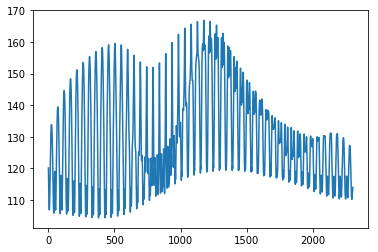

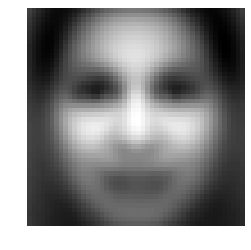

Z shape: (28710, 2304)
C shape: (2304, 2304)


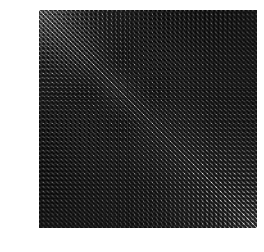

V check: True
V1 check: 1.0000000000000007
V2 check: 1.0000000000000007
V dot check: 8.673617379884035e-17
V Shape:(2304, 2304)
P Shape:(28710, 2304)
P mean:[ 3.56195267e-06 -3.63664437e-06  2.66969632e-06 ...  8.04589544e-07
 -2.25311615e-06 -2.47845627e-07]
R Shape:(28710, 2304)
Xrec2 Shape:(28710, 2304)


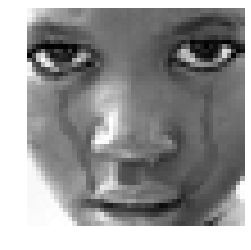

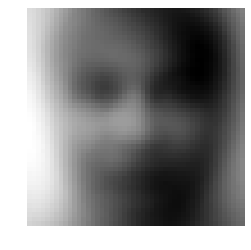

In [9]:
X, mu, Z, Eigenvalues, V, P, R, Xrec = XZCVPR(Train_data)

# PCA

In [10]:
### How many Principle Components to use:
print (Eigenvalues)

[2.65440200e+06 9.04194980e+05 8.68031217e+05 ... 4.14274266e+00
 3.96740445e+00 3.75960704e+00]


In [11]:
cumulative_variance=[]
net_variance=[]
temp=0.0
E_sum=np.sum(Eigenvalues)
for i in Eigenvalues:
    temp=temp+i
    cumulative_variance.append(temp*100/E_sum)
    net_variance.append(i*100/E_sum)
    

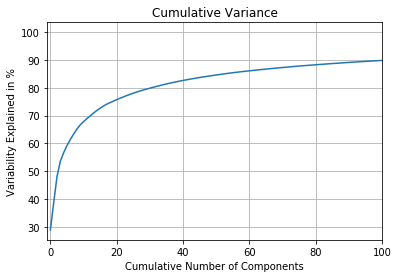

In [12]:
plt.plot(range(len(cumulative_variance)),cumulative_variance)
plt.title("Cumulative Variance")
plt.xlim(right=100,left=-1)
plt.xlabel("Cumulative Number of Components")
plt.ylabel("Variability Explained in %")
plt.grid()


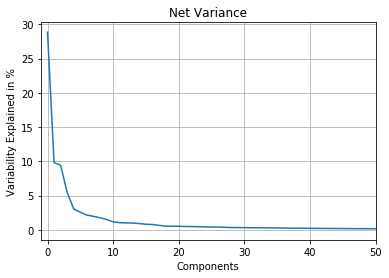

In [13]:
plt.plot(range(len(net_variance)),net_variance)
plt.xlim(right=50,left=-1)
plt.title("Net Variance")
plt.xlabel("Components")
plt.ylabel("Variability Explained in %")
plt.grid()


In [14]:
pca_num_components=len(list(filter(lambda x: x <= 75, cumulative_variance)))  ### 75% Variability Explained with 19 components
print ("Optimial # of PCA: " + str(pca_num_components))

Optimial # of PCA: 19


In [15]:
Train_pca=pd.DataFrame(P[:,:pca_num_components])
print ("Train_pca shape: " + str(Train_pca.shape))

Train_pca shape: (28710, 19)


In [16]:
p_max = np.max(pd.DataFrame.max(Train_pca).values)
print ("Max P Value: " + str(p_max))

Max P Value: 5998.417219324421


In [17]:
p_min = np.min(pd.DataFrame.min(Train_pca).values)
print ("Min P Value: " + str(p_min))


Min P Value: -5726.182846610701


In [18]:
# Max and min value of each princial component

mins=pd.DataFrame.min(Train_pca).values
maxs=pd.DataFrame.max(Train_pca).values

# Histogram 

In [19]:
np.ceil(np.log2(28709/7))+1  ### Number of bins

14.0

In [20]:
#x=np.dot(prin_comp[:,:pca_num_components],Eigenvectors[:pca_num_components,:])+ meanvector

In [21]:
def Hist2D(mydata,mybins): ## Insert a dataframe
    min1=min(mydata["pc1"])
    min2=min(mydata["pc2"])
    max1=max(mydata["pc1"])
    max2=max(mydata["pc2"])
    mins
    maxs
    
    
    HN=np.zeros(shape=(mybins,mybins)).astype('int32')
    HP=np.zeros(shape=(mybins,mybins)).astype('int32')
    row=[round(((mybins-1)*((xi-min1)/(max1-min1)))) for xi in mydata["pc1"]]
    col=[round(((mybins-1)*((xj-min2)/(max2-min2)))) for xj in mydata["pc2"]]
    for i in range(len(mydata)):
        if mydata.iloc[i,2]==6:
            HN[row[i],col[i]]+=1
        else:
            HP[row[i],col[i]]+=1
    return HN,HP
        

# PDF